# Learning outcomes
1. kNN classifier: how it works? Create data and labels and apply knn to make prediction on unseen data
2. (Histogram of gradient) HOG is a way of extracting features from images
3. Demo on different problems: multiclass and binary problem

In [1]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

# How kNN works

The prediction:[[1.]]
The labels of neighbours:[[1. 1. 0.]]
The square distance:[[169. 452. 793.]]


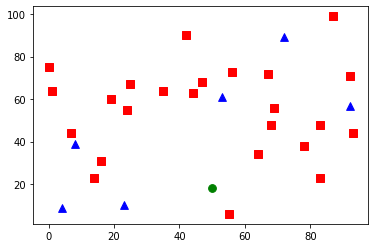

In [2]:
np.random.seed(7)

# generate (randomly sample from uniform distribution [0-99])
train_data = np.random.randint(0,100,size=(30,2)).astype(np.float32)
targets = np.random.randint(0,2,size=(30,1)).astype(np.float32)

#subset the data based on the targets
datA = train_data[targets.ravel()==0]
plt.scatter(datA[:,0],datA[:,1],marker="^",c="b",s=60)

datB = train_data[targets.ravel()==1]
plt.scatter(datB[:,0],datB[:,1],marker="s",c="r",s=60)

# sample a new data
new_data = np.random.randint(0,100,size=(1,2)).astype(np.float32)
plt.scatter(new_data[:,0],new_data[:,1],marker="o",c="g",s=60)

# create a kNN object (Opencv function)
knn = cv.ml.KNearest_create()
knn.train(train_data,cv.ml.ROW_SAMPLE,targets)
ret, pred, label_neigh,sq_dist = knn.findNearest(new_data,3)

print(f"The prediction:{pred}")
print(f"The labels of neighbours:{label_neigh}")
print(f"The square distance:{sq_dist}")

plt.show()

In [3]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\owenc\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn.fit(train_data,targets.flatten())
print(f"The prediction:{knn.predict(new_data)}")

The prediction:[1.]


In [5]:
knn.kneighbors(new_data)

(array([[13.        , 21.26029163, 28.16025568]]),
 array([[11, 17, 28]], dtype=int64))

In [6]:
dist, idx_neig = knn.kneighbors(new_data)

targets[idx_neig]

array([[[1.],
        [1.],
        [0.]]], dtype=float32)

# fashion mnist data classification with kNN

In [7]:
sys.path.insert(1,"C:/Users/owenc/Documents/Owen/UTAR Degree/Y3S1/UCCC2513 MINI PROJECT/week 10/fashion-mnist-master/utils")

In [8]:
import mnist_reader

X_train,y_train = mnist_reader.load_mnist("./fashion-mnist-master/data/fashion")
X_test,y_test = mnist_reader.load_mnist("./fashion-mnist-master/data/fashion")


In [9]:
X_train.shape

(60000, 784)

The first value in the shape output is the number of samples: 60,000. 784 is the individual 

In [10]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker",
               "Bag", "Ankle boot"]

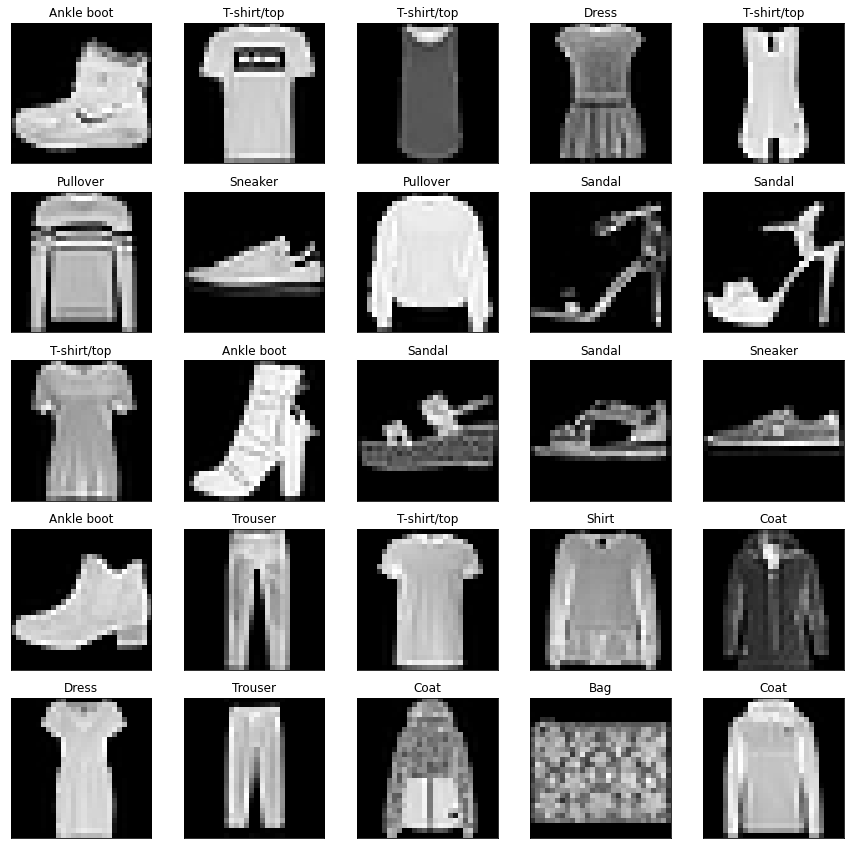

In [11]:
# Visualization
plt.figure(figsize=(15,15))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap=plt.cm.gray)
    plt.xticks([]),plt.yticks([])
    plt.title(class_labels[y_train[i]])
    
plt.show()

In [12]:
# preprocessing, not necessary because the range has been standardized to [0-255]
np.random.seed(100)
shuffled_idx = np.random.permutation(len(X_train))
n_sample = int(0.1*len(X_train))
X_train_part = X_train[shuffled_idx[:n_sample]]
y_train_part = y_train[shuffled_idx[:n_sample]]

In [13]:
X_train_part.shape

(6000, 784)

In [14]:
from sklearn.model_selection import cross_val_score # k-fold CV accuracy

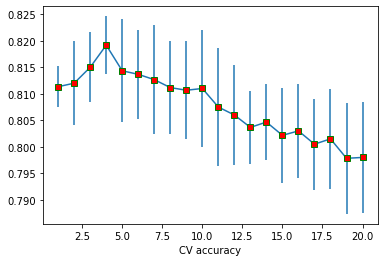

In [29]:
k_list = np.arange(1,21)

mean_acc = []
std_acc = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    scores = cross_val_score(knn,X_train_part,y_train_part)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    
plt.errorbar(k_list, mean_acc, std_acc, marker="s",mec="g",mfc="r")
plt.xlabel("Number of nearest neighbours")
plt.ylabel("CV accuracy")
plt.show()

In [30]:
import time

In [31]:
k_opt = k_list[np.argmax(mean_acc)]

start = time.time()

#retrain the knn with all the train data
knn = KNeighborsClassifier(n_neighbors=k_opt,n_jobs=-1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(f"The execution time of training and prediction:{(time.time() - start):.3f}s.")

The execution time of training and prediction:142.628s.


In [32]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [33]:
print(classification_report(y_test,pred,target_names=class_labels))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.95      0.88      6000
     Trouser       0.99      0.98      0.99      6000
    Pullover       0.80      0.90      0.85      6000
       Dress       0.93      0.92      0.93      6000
        Coat       0.87      0.83      0.85      6000
      Sandal       1.00      0.93      0.96      6000
       Shirt       0.83      0.65      0.73      6000
     Sneaker       0.93      0.98      0.96      6000
         Bag       0.99      0.96      0.98      6000
  Ankle boot       0.95      0.97      0.96      6000

    accuracy                           0.91     60000
   macro avg       0.91      0.91      0.91     60000
weighted avg       0.91      0.91      0.91     60000



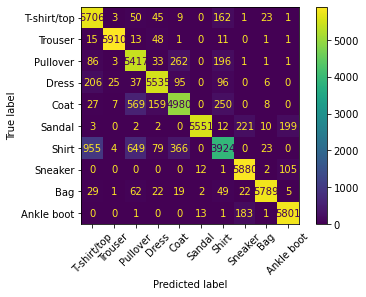

In [34]:
conf_mat = confusion_matrix(y_test,pred)
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=class_labels)

conf_mat_display.plot()
plt.xticks(rotation=45)
plt.show()

In [35]:
conf_mat[:,-4].sum()

4702

# cats vs dogs classification

In [36]:
# create classes that can preprocess and load data
class dataPreprocessor:
    def __init__(self,width,height,inter=cv.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter
        
    def process(self,img):
        return cv.resize(img,(self.width,self.height),interpolation=self.inter)

In [51]:
class dataLoader:
    def __init__(self,preprocessor=None):
        self.preprocessor = preprocessor
        
        if self.preprocessor is None:
            self.preprocessor = []
    
    def load(self,imgPath):
        data = []
        labels = []
        
        for imgName in os.listdir(imgPath):
            filePath = os.path.join(imgPath,imgName)
            img = cv.imread(cv.samples.findFile(filePath))
            label = imgName.split(".")[0]
            
            if self.preprocessor is not None:
                for p in self.preprocessor:
                    img = p.process(img)
                    
            data.append(img)
            labels.append(label)
            
        return np.array(data), np.array(labels)

In [52]:
dataPrep = dataPreprocessor(64,64)
dataLoad = dataLoader(preprocessor=[dataPrep])
X,y = dataLoad.load("./cats_vs_dogs_small")

In [53]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=500,
                                                random_state=50)

In [54]:
winSize = (64, 64)
blockSize = (16, 16)
blockStride = (8, 8)
cellSize = (8, 8)
# feature size of 144
nbins = 9
derivAperture = 1
winSigma = -1
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = True
nlevels = 64
signedGradients = False

hog = cv.HOGDescriptor(winSize, blockSize, blockStride,
                      cellSize, nbins, derivAperture, winSigma, 
                      histogramNormType, L2HysThreshold,
                      gammaCorrection, nlevels, signedGradients)

In [55]:
from sklearn.preprocessing import MinMaxScaler

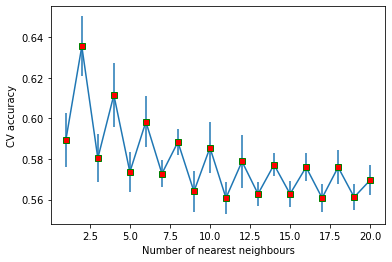

In [57]:
# Feature transform on train data
X_train_hog = [hog.compute(x) for x in X_train]
X_train_hog = np.array(X_train_hog)
scaler = MinMaxScaler()
X_train_hog = scaler.fit_transform(X_train_hog)

k_list = np.arange(1,21)

mean_acc = []
std_acc = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    scores = cross_val_score(knn,X_train_hog,y_train)
    mean_acc.append(scores.mean())
    std_acc.append(scores.std())
    
plt.errorbar(k_list, mean_acc, std_acc, marker="s",mec="g",mfc="r")
plt.xlabel("Number of nearest neighbours")
plt.ylabel("CV accuracy")
plt.show()

In [65]:
# transform X_test and scale it
X_test_hog = [hog.compute(x) for x in X_test]
X_test_hog = np.array(X_test_hog)
scaler = MinMaxScaler()
X_test_hog = scaler.fit_transform(X_test_hog)

k_opt = k_list[np.argmax(mean_acc)]

start = time.time()

#retrain the knn with all the train data
knn = KNeighborsClassifier(n_neighbors=k_opt,n_jobs=-1)
knn.fit(X_train_hog,y_train)
print(f"The execution time of training and prediction:{(time.time() - start):.3f}s.")

The execution time of training and prediction:0.008s.


In [66]:
print(classification_report(y_test, knn.predict(X_test_hog), target_names=["cat", "dog"]))

              precision    recall  f1-score   support

         cat       0.65      0.36      0.47       250
         dog       0.56      0.80      0.66       250

    accuracy                           0.58       500
   macro avg       0.60      0.58      0.56       500
weighted avg       0.60      0.58      0.56       500



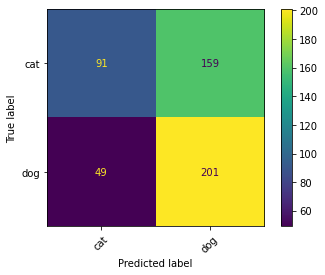

In [68]:
conf_mat = confusion_matrix(y_test,knn.predict(X_test_hog))
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=knn.classes_)

conf_mat_display.plot()
plt.xticks(rotation=45)
plt.show()